## Data Loading

In [1]:
# import the library
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sdata = pd.read_csv('data/50_Startups.csv')
sdata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data Cleaning and Understanding

In [3]:
# shape of the data
print('Dimenssion:', sdata.shape)

Dimenssion: (50, 5)


In [4]:
sdata.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
# null values check
sdata.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# dublicate entry check
sdata[sdata.duplicated()].shape

(0, 5)

    - No missing data is found
    - No dublication data is found

In [7]:
# check the unique values in Categorical data
sdata['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

    - Categorical data is found in State and analyzed by unique entries

## Label Encoder

* 'State' dataframe has categorical values, we need to seperate them for processing

In [8]:
# label encoder 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# creating object of LabelEncoder()
labelE = LabelEncoder() 

In [9]:
# callling the method from object 'labelE' which returns interger array category
labelE.fit_transform(sdata['State'])

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [10]:
# count the categorical values
sdata['labelE1'] = labelE.fit_transform(sdata['State'])
sdata['labelE1'].value_counts()

2    17
0    17
1    16
Name: labelE1, dtype: int64

In [11]:
# count the categorical values with its catrgory
sdata['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

    - The counts for 'State' is exactly same as the 'labelE'
    
    New York = 17
    California = 17
    Florida = 16

## One-Hot Encodoing

In [12]:
# get dummies entry (0, 1) for categorical variables
add_columns = pd.get_dummies(sdata['State'])
add_columns.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [13]:
sdata.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit,labelE1
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


    Issue: labelE1 is coming up here which shows category of 'State'. But still it can't give which State category it belongs to. Hence we are droping that column and join the dummy variables column 'add_coumns'

In [14]:
# column join (Dummy variables)
sdata = sdata.join(add_columns)
sdata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,labelE1,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,2,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,2,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0,1,0


In [15]:
# drop the columns having Categorical data
sdata.drop(['labelE1','State'], axis = 1, inplace = True)

In [16]:
sdata.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


    - Conversion of all data is completed and in the form of numeric only

In [17]:
# rename the dataframes for further analysis and operations
sdata_new_1 = sdata.rename(columns = {'R&D Spend': 'RDS', 'Administration': 'Admin', 'Marketing Spend' : 'MarketS',
                                     'California': 'C', 'Florida': 'F', 'New York' : 'N'})
sdata_new_1.head()

,RDS,Admin,MarketS,Profit,C,F,N
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## Data Visualization and Explore

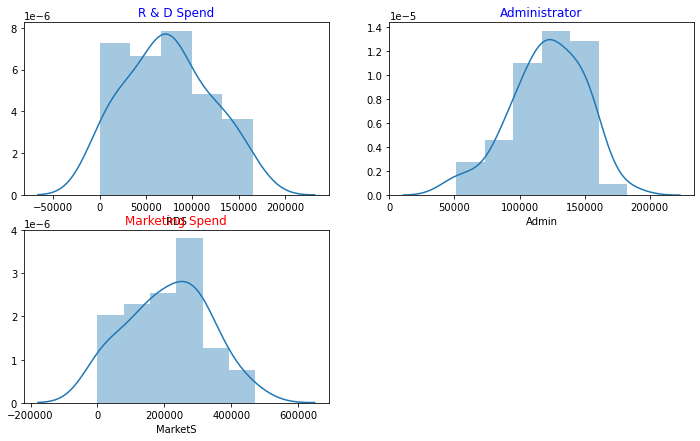

In [18]:
# distribution of data
plt.figure(figsize=(12,7))

plt.subplot(2, 2, 1)
sns.distplot(sdata_new_1['RDS'], kde = True)
plt.title('R & D Spend', color='blue')

plt.subplot(2, 2, 2)
sns.distplot(sdata_new_1['Admin'], kde = True)
plt.title('Administrator',color='blue')

plt.subplot(2, 2, 3)
sns.distplot(sdata_new_1['MarketS'], kde = True)
plt.title('Marketing Spend', color='red')

plt.show()

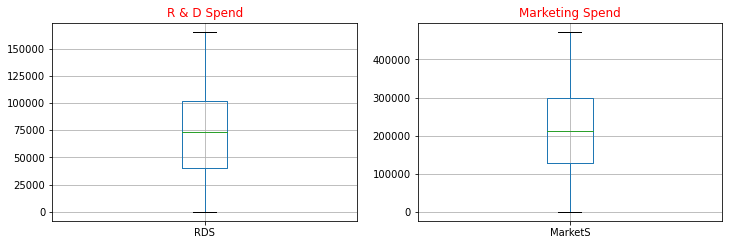

In [19]:
# check the outliers
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sdata_new_1.boxplot(column=['RDS'])
plt.title('R & D Spend', color='red')

plt.subplot(2, 2, 2)
sdata_new_1.boxplot(column=['MarketS'])
plt.title('Marketing Spend', color='red')

plt.show()

    - Data is almost symmetric in the nature
    - No outliers present in the diven data

Text(0.5, 1.0, 'Coorelation heatmap')

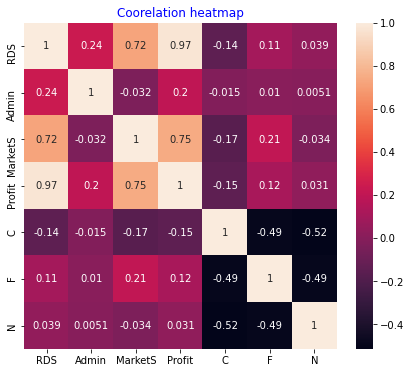

In [20]:
# coorelation matrix
plt.figure(figsize = (7,6))
sns.heatmap(sdata_new_1.corr(), annot = True)
plt.title('Coorelation heatmap', color='blue')

In [21]:
sdata_new_1.corr()

,RDS,Admin,MarketS,Profit,C,F,N
RDS,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MarketS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
C,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
F,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
N,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


    - Profit and R&D Spends are highly coorelated (0.97)
    - Profit and Market Spends are coorelated (0.74)    

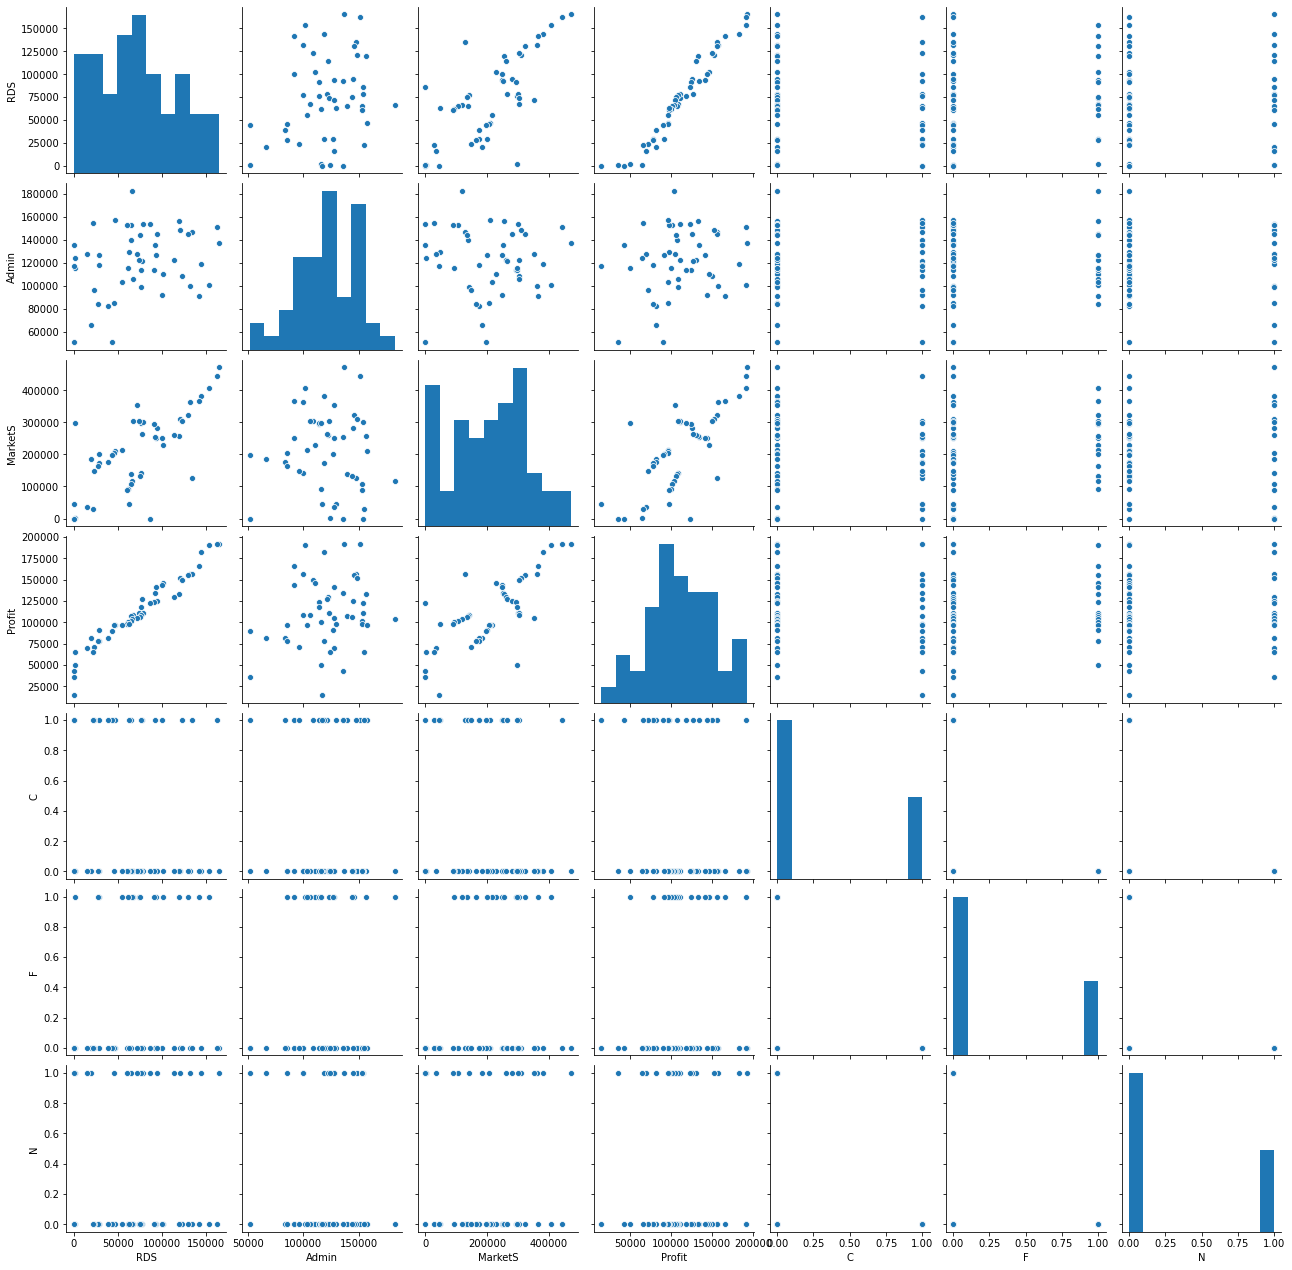

In [22]:
sns.pairplot(sdata_new_1)

## Preparing Models

#### Model 1 (Considering all the features)

In [23]:
model1 = smf.ols('Profit ~ RDS + Admin + MarketS + C + F + N', data = sdata_new_1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.34e-27
Time:                        12:31:52   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RDS            0.8060      0.046     17.369      0.000       0.712       0.900
Admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketS        0.0270      0.017      1.574      0.123      -0.008       0.062
C           1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
F           1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
N           1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

1) The Coefficient values of independent features are,

        RDS = 0.000
        Admin = 0.608
        MarketS = 0.123
        C = F = N = 0.000 

2) R-squared = 0.951

    - Accuracy = 95.10%

3) Administrations and Market Spends are not significant for predicting Profit

    - Because their coefficient value are greater than the significant p-value (0.05)

#### Model 2 (Considering one feature only)

In [24]:
model2_admin = smf.ols('Profit ~ Admin', data = sdata_new_1).fit()
model2_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 16 Oct 2020   Prob (F-statistic):              0.162
Time:                        12:31:53   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model2_market = smf.ols('Profit ~ MarketS', data = sdata_new_1).fit()
model2_market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           4.38e-10
Time:                        12:31:53   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketS        0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 3 (Considering all above features with togather)

In [26]:
model3_admin_market = smf.ols('Profit ~ Admin + MarketS', data = sdata_new_1).fit()
model3_admin_market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           2.50e-10
Time:                        12:31:53   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
MarketS        0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1) Model 2 (Independent performance analysis)

    - Significance of Market Spends is good as compared to Administrations

2) Model 3 (Dependent performance analysis by adding)

    - Significance of Market Spends and Administrations is low when analyzed with todather

## Calculate VIF

In [27]:
# Variance Influance Factor (Multi-collinearity detection)
rsq_profit = smf.ols('Profit ~ RDS + Admin + MarketS + F + C + N', data = sdata_new_1).fit().rsquared
vif_profit = 1/(1 - rsq_profit)

rsq_RDS = smf.ols('RDS ~ Profit + Admin + MarketS + F + C + N', data = sdata_new_1).fit().rsquared
vif_RDS = 1/(1 - rsq_RDS)

rsq_Admin = smf.ols('Admin ~ RDS + Profit + MarketS + F + C + N', data = sdata_new_1).fit().rsquared
vif_Admin = 1/(1 - rsq_Admin)

rsq_MarketS = smf.ols('MarketS ~ RDS + Admin + Profit + F + C + N', data = sdata_new_1).fit().rsquared
vif_MarketS = 1/(1 - rsq_MarketS)

dataAll = {'Variables' : ['Profit' , 'RDS', 'Admin', 'MarketS'], 
          'VIF' : [vif_profit, vif_RDS, vif_Admin, vif_MarketS]}
VIF_frame = pd.DataFrame(dataAll)
VIF_frame

,Variables,VIF
0,Profit,20.305593
1,RDS,19.604937
2,Admin,1.184921
3,MarketS,2.552858


    - VIF factor should be less than 5 (in some cases, 10)
    - Administrations andMarket Spends fullfill the condition 
    - But Profit and R&D Spends, we need to check factors affecting the VIF

## Model Deletion Diagnostics

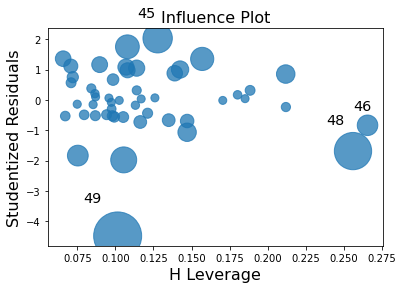

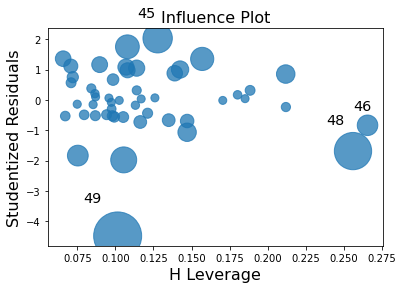

In [28]:
# influence plot (index based analysis)
sm.graphics.influence_plot(model1)

    - Records having index 49, 48 has more influence
    - We need to drop these index and again build existing model (46 is also droping)
    - Records deletion is better than whole independent variable deletion

In [29]:
# records deletion having index 49, 48, 46
sdata_new_2 = sdata_new_1.drop(sdata_new_1.index[[49, 48, 46]], axis = 0)
sdata_new_2.head()

,RDS,Admin,MarketS,Profit,C,F,N
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [30]:
# again rename because of dataframe name gets changes to original due to droping the records
sdata_new_2 = sdata_new_2.rename(columns = { 'R&D Spend' : 'RDS', 'Administration' : 'Admin',
                                            'Marketing Spend' : 'MarketS', 'California': 'C', 
                                            'Florida': 'F', 'New York' : 'N'})
sdata_new_2.head()

,RDS,Admin,MarketS,Profit,C,F,N
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#### Model 2 (Considering all features with 3 records removed)

In [31]:
# model 2 (after removal of 3 records)
model2 = smf.ols('Profit ~ RDS + Admin + MarketS + C + F + N', data = sdata_new_2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     204.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           7.33e-28
Time:                        12:31:54   Log-Likelihood:                -482.58
No. Observations:                  47   AIC:                             977.2
Df Residuals:                      41   BIC:                             988.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.353e+04   4562.992      9.540      0.000    3.43e+04    5.27e+04
RDS            0.7646      0.042     18.275      0.000       0.680       0.849
Admin         -0.0525      0.045     -1.157      0.254      -0.144       0.039
MarketS        0.0254      0.015      1.669      0.103      -0.005       0.056
C           1.492e+04   2046.097      7.292      0.000    1.08e+04    1.91e+04
F           1.431e+04   2250.384      6.359      0.000    9764.657    1.89e+04
N            1.43e+04   2226.132      6.424      0.000    9804.805    1.88e+04
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.531
Skew:                           0.062   Prob(JB):                        0.767
Kurtosis:                       2.494   Cond. No.                     2.41e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

    - Model 2 is more acceptable than Model 1. Model 2 performance is slightly better than Model 1
    - The accuracy is coming out 0.961 from 0.951
    
        [R-Squared]    |    [Adj R-Squared]    |     [p-values]     |     [Features]
    ------------------------------------------------------------------------------------
     0.951 (0.961)      0.945 (0.957)           0.000 (0.000)         R&D Spends
                                                0.608 (0.254)         Administrations
                                                0.123 (0.103)         Market Spends
                                                0.000 (0.000)         C / F / N
    
    Note: with () values are Model 2 and without () values are Model 1
    
    - But still Administration and Market Spends have high p-value. So next goal is to analyze the factors affecting on these variables (multi collinearity)
    
    

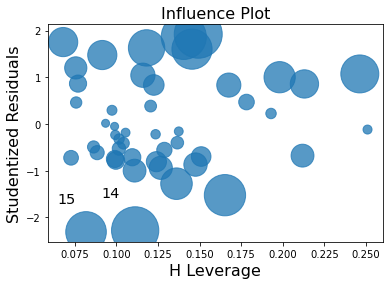

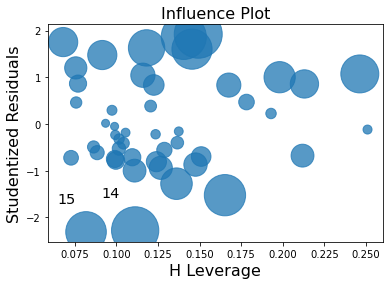

In [32]:
# plot influence graph
sm.graphics.influence_plot(model2)

## Partial Regression Plot

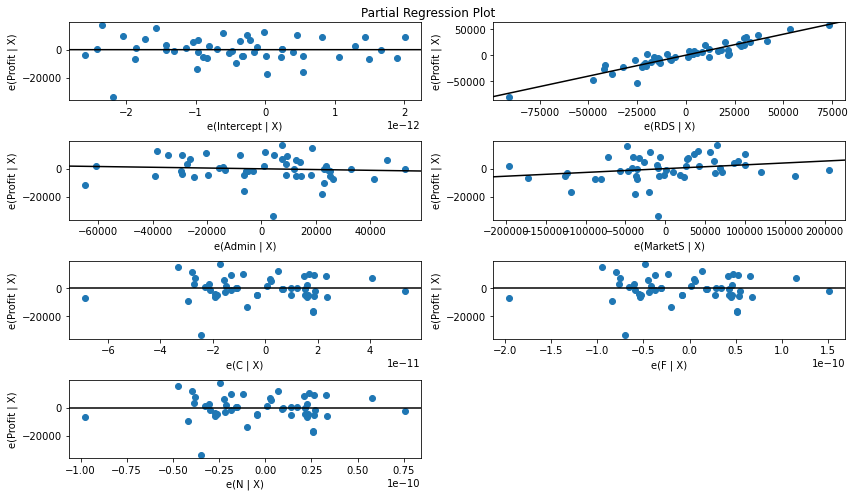

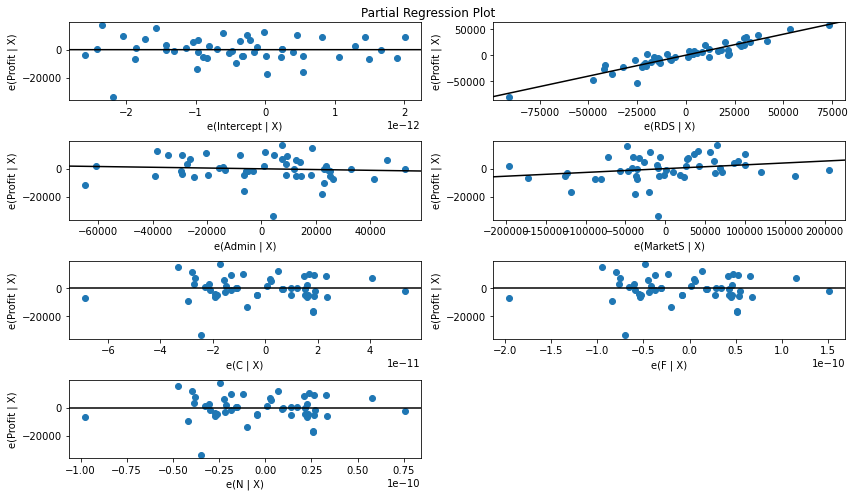

In [33]:
fig = plt.figure(figsize = (12,7))
sm.graphics.plot_partregress_grid(model1, fig = fig)

    - Administrations has more straight line than Market Spends
    - So, we remove Administration feature from data and build the model

#### Model 3 (Considering all features excluding Administrations)

In [34]:
model3 = smf.ols('Profit ~ RDS + MarketS + C + F + N', data = sdata_new_2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     253.5
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           8.29e-29
Time:                        12:31:59   Log-Likelihood:                -483.34
No. Observations:                  47   AIC:                             976.7
Df Residuals:                      42   BIC:                             985.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.869e+04   1837.843     21.054      0.000     3.5e+04    4.24e+04
RDS            0.7447      0.038     19.443      0.000       0.667       0.822
MarketS        0.0325      0.014      2.328      0.025       0.004       0.061
C           1.341e+04   1581.417      8.480      0.000    1.02e+04    1.66e+04
F            1.27e+04   1778.684      7.142      0.000    9114.033    1.63e+04
N           1.258e+04   1664.233      7.560      0.000    9222.491    1.59e+04
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.306
Skew:                           0.052   Prob(JB):                        0.858
Kurtosis:                       2.618   Cond. No.                     2.84e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

    - The p-value of Market Spends is fastly decreased to 0.025 from 0.103 
    - Overall accuracy of Model 1 having the same significance level as precious Model 2

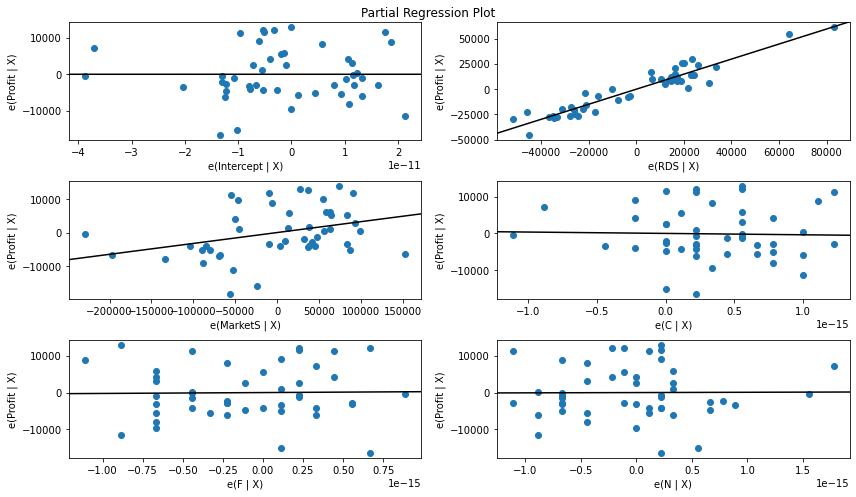

In [35]:
fig = plt.figure(figsize = (12,7))
fig = sm.graphics.plot_partregress_grid(model3, fig = fig)

## Residual Plots (fitted value vs residuals)

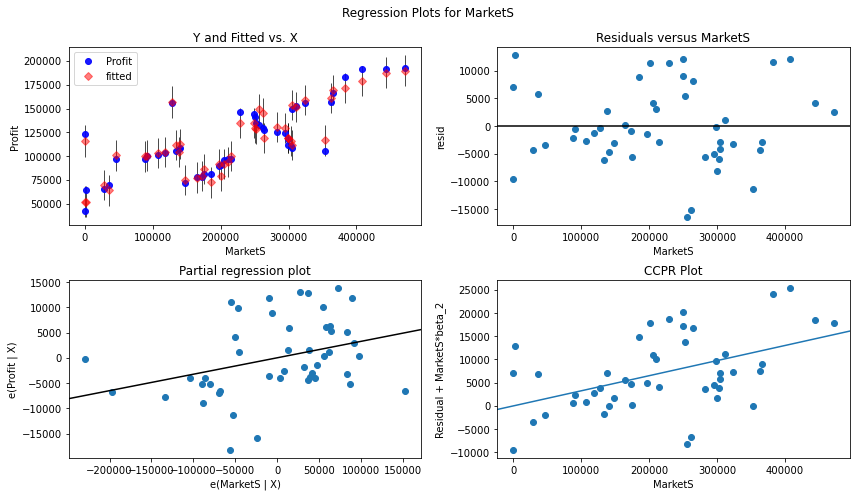

In [36]:
# scatter plot to visualize the relationship between the data
fig = plt.figure(figsize =(12,7))
fig = sm.graphics.plot_regress_exog(model3, 'MarketS', fig = fig)

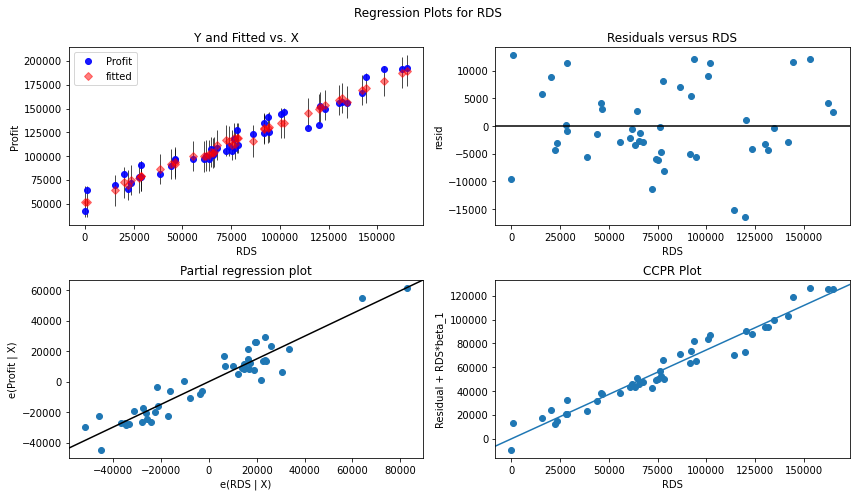

In [37]:
fig = plt.figure(figsize =(12,7))
fig = sm.graphics.plot_regress_exog(model3, 'RDS', fig = fig)

    - The residuals are normally distributed within the line
    - No U-shaped or V-shaped pattern is found
    
* Best fit model from (Model 1, Model 2, Model 3) is Model 3
* Accuracy = 96.00 %
* Resolve the collinearity issue by removing the independent unnecessary feature

* Now trying it out with Training Set and Testing Set for more better results

## Building Model using data spliting (Train + Test)

In [38]:
# split the data into Training set (80%) and Testing set (20%)

from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(sdata_new_2, test_size = 0.2, random_state = 0)

In [39]:
# check the size of Training set and Testing set 
print('Training set size:', len(x_train))
print('Testing set size:', len(x_test))

Training set size: 37
Testing set size: 10


#### Model 4 (training phase: considering all features excluding Administrations)

In [40]:
# Train the model with all features excluding Administrations
model_train = smf.ols('Profit ~ RDS + MarketS + C + F + N', data = x_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     196.1
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           5.10e-22
Time:                        12:32:04   Log-Likelihood:                -382.17
No. Observations:                  37   AIC:                             774.3
Df Residuals:                      32   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.916e+04   2163.827     18.100      0.000    3.48e+04    4.36e+04
RDS            0.7271      0.043     16.774      0.000       0.639       0.815
MarketS        0.0369      0.016      2.299      0.028       0.004       0.070
C            1.29e+04   1841.562      7.004      0.000    9147.961    1.67e+04
F           1.356e+04   2432.096      5.575      0.000    8603.755    1.85e+04
N           1.271e+04   1906.559      6.665      0.000    8823.890    1.66e+04
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.640
Skew:                          -0.183   Prob(JB):                        0.726
Kurtosis:                       2.471   Cond. No.                     1.34e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
# train data prediction
train_predict = model_train.predict(x_train)
train_predict.head()

27    117343.723117
32     99869.182776
29    103529.397340
43     64458.060883
2     179352.970198
dtype: float64

In [42]:
# train residuals values
train_residuals = train_predict - x_train.Profit
train_residuals.head()

27    12335.413117
32     2441.342776
29     2524.757340
43    -5300.919117
2    -11697.419802
dtype: float64

In [43]:
# RMSE value
train_rmse = np.sqrt(np.mean(train_residuals * train_residuals))
print(train_rmse)

7405.324488041575


In [44]:
# test data prediction
test_predict = model_train.predict(x_test)
test_predict.head()

28    105110.661200
33    100997.731315
30    101163.072374
4     169569.566896
18    130323.452945
dtype: float64

In [45]:
# test residuals values
test_residuals = test_predict - x_test.Profit
test_residuals.head()

28    1828.281200
33    4218.811315
30    1225.482374
4     3381.626896
18    6056.552945
dtype: float64

In [46]:
# RMSE value
test_rmse = np.sqrt(np.mean(test_residuals * test_residuals))
print(test_rmse)

5940.321243277686


* Training model performance (Model_train)
            
      - Accuracy = 96.10 %
      - Training RMSE = 7405.32

## Final Model based on Training set and Testing set

#### Model 5 (Testing phase)

In [47]:
model_final_version = smf.ols('Profit ~ RDS + MarketS + C + F + N', data = x_test).fit()
model_final_version.summary()

C:\Users\K.K\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     63.59
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           0.000178
Time:                        12:32:05   Log-Likelihood:                -96.582
No. Observations:                  10   AIC:                             203.2
Df Residuals:                       5   BIC:                             204.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.595e+04   3561.730     10.093      0.000    2.68e+04    4.51e+04
RDS            0.9260      0.085     10.900      0.000       0.708       1.144
MarketS       -0.0195      0.031     -0.639      0.551      -0.098       0.059
C           1.825e+04   3561.394      5.124      0.004    9094.560    2.74e+04
F           1.106e+04   3129.660      3.533      0.017    3013.418    1.91e+04
N           6640.8170   4571.444      1.453      0.206   -5110.453    1.84e+04
==============================================================================
Omnibus:                        6.624   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                2.466
Skew:                           1.118   Prob(JB):                        0.291
Kurtosis:                       3.959   Cond. No.                     2.80e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.53e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Best fit Model = Model 5 (model_final_version)

        - Accuracy = 98.10 %
        - Adj R-Squared = 96.5 % (features selection)
        - RMSE value = 5940.32 (error measures)
        - Necessary features = R&D spends + Market spends + States